# Zonal Statistics

Goal:
- Extract zones from the vector dataset
- Convert vector data to raster
- Calculate NDVI statistics for different zones

Planning:
- Obtain zone information from `fields_cropped` vector data
- Make vector and raster data compatible (e.g. shape and CRS)
- Rasterize the vector zone
- Calculate zonal statistics for each zone

## Making the data compatible

In [1]:
# Open the NDVI raster file
import rioxarray

# Open the ndvi raster and delete the band dimension
ndvi = rioxarray.open_rasterio("NDVI.tif").squeeze()

In [2]:
ndvi

<xarray.DataArray (y: 1000, x: 1000)> Size: 4MB
[1000000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 8kB 6.29e+05 6.29e+05 ... 6.39e+05 6.39e+05
  * y            (y) float64 8kB 5.814e+06 5.814e+06 ... 5.804e+06 5.804e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [4]:
# Open the fields_cropped shapefile
import geopandas as gpd
fields = gpd.read_file("fields_cropped.shp")

In [5]:
fields

,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120154.932 495930.341, 120154.309 49..."
1,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120101.483 496378.781, 120100.177 49..."
2,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((119858.185 496057.345, 119855.745 49..."
3,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120168.354 496651.174, 120160.995 49..."
4,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((119944.018 496061.229, 119924.704 49..."
...,...,...,...,...,...,...
4867,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133371.14 492631.152, 133363.203 492..."
4868,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133422.246 492887.057, 133420.13 492..."
4869,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133554.659 492738.186, 133554.924 49..."
4870,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133434.981 492748.79, 133430.854 492..."


In [6]:
# Make sure the vector and raster have same CRS
fields_utm = fields.to_crs(ndvi.rio.crs) 

## Rasterize the vector

In [7]:
geom = fields_utm[['geometry', 'gewascode']].values.tolist()
geom

[[<POLYGON ((627394.386 5812746.538, 627393.681 5812749.022, 627384.063 581279...>,
  265],
 [<POLYGON ((627326.17 5813192.913, 627324.734 5813196.828, 627324.11 5813203....>,
  265],
 [<POLYGON ((627093.646 5812863.661, 627090.972 5812870.702, 627076.762 581286...>,
  265],
 [<POLYGON ((627384.004 5813467.33, 627376.549 5813470.117, 627385.233 5813495...>,
  265],
 [<POLYGON ((627179.293 5812870.376, 627160.747 5812846.868, 627159.505 581284...>,
  331],
 [<POLYGON ((627419.816 5812765.254, 627416.356 5812766.811, 627413.1 5812769....>,
  265],
 [<POLYGON ((627358.683 5813335.376, 627362.871 5813352.853, 627370.175 581337...>,
  265],
 [<POLYGON ((627423.06 5813550.358, 627421.409 5813550.392, 627427.293 5813568...>,
  265],
 [<POLYGON ((627191.219 5813028.547, 627189.596 5813028.866, 627186.64 5813029...>,
  265],
 [<POLYGON ((627349.601 5813329.836, 627343.37 5813330.159, 627341.775 5813330...>,
  265],
 [<POLYGON ((627809.311 5811941.534, 627793.366 5811967.477, 627778.317 581199..

In [ ]:
# Rasterize the list of geometry and gewascode. Add the CRS information from NDVI
from rasterio import features

fields_rasterized = features.rasterize(geom, out_shape=ndvi.shape, transform=ndvi.rio.transform())

In [9]:
# Inspect the result of rasterization
import numpy as np
# - Print the shape of rasterized vector
print(fields_rasterized.shape)
# - Print unique value from gewascode
print(np.unique(fields_rasterized))

(1000, 1000)
[  0 259 265 266 331 332 335 863]


In [11]:
type(fields_rasterized)

numpy.ndarray

In [12]:
fields_rasterized

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
ndvi

<xarray.DataArray (y: 1000, x: 1000)> Size: 4MB
[1000000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 8kB 6.29e+05 6.29e+05 ... 6.39e+05 6.39e+05
  * y            (y) float64 8kB 5.814e+06 5.814e+06 ... 5.804e+06 5.804e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

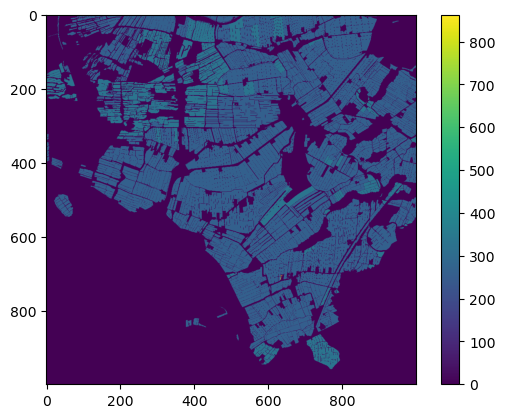

In [10]:
# Plot the rasterized data
from matplotlib import pyplot as plt
plt.imshow(fields_rasterized)

plt.colorbar()

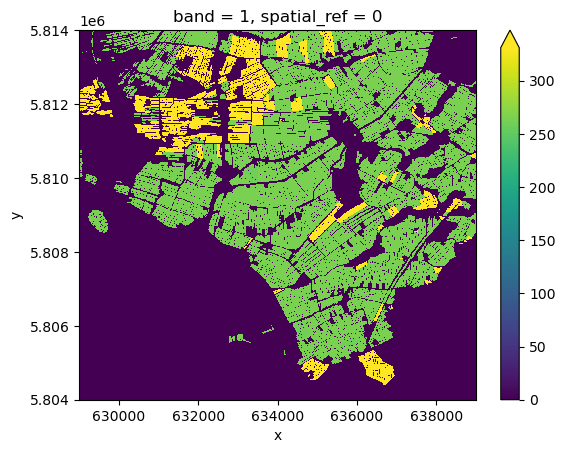

In [14]:
# Convert rasterized ndarray to xarray using the "template" from NDVI

import xarray as xr
# Use ndvi raster as template
fields_rasterized_xarr = ndvi.copy()
# Replace the data of copied structure with rasterized
fields_rasterized_xarr.data = fields_rasterized

# Visualize
fields_rasterized_xarr.plot(robust=True)

## Calculate the zonal statistics

In [18]:
!pip install dask pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 11.8 MB/s eta 0:00:00a 0:00:01


In [19]:
# Import the zonal_stats function
from xrspatial import zonal_stats
# Do calculation. 
# - First parameter is the zone in xarray type
# - Second parameter is the raster that is going to be classified and calculated
zonal_stats(fields_rasterized_xarr, ndvi)

,zone,mean,max,min,sum,std,var,count
0,0,0.291683,0.999435,-0.998357,170186.250000,0.355448,0.126343,583463.0
1,259,0.519781,0.893031,0.202402,1768.814697,0.109469,0.011984,3403.0
2,265,0.781536,0.959217,0.138824,268275.406250,0.091291,0.008334,343267.0
3,266,0.798432,0.925953,0.448120,4178.992188,0.075825,0.005749,5234.0
4,331,0.710946,0.910625,0.155107,43253.261719,0.102585,0.010524,60839.0
5,332,0.700648,0.861245,0.308974,1306.007202,0.109584,0.012009,1864.0
6,335,0.654265,0.883563,0.241567,1252.917725,0.148430,0.022032,1915.0
7,863,0.478134,0.719927,0.248347,7.172009,0.177491,0.031503,15.0


## Exercise

Calculate NDVI zonal statistics for the different zones as classified by `ndvi_classified` in the previous episode.

Load both raster datasets: `NDVI.tif` and `NDVI_classified.tif`. Then, calculate zonal statistics for each `class_bins`. Inspect the output of the `zonal_stats` function.

In [20]:
ndvi_classified = rioxarray.open_rasterio("NDVI_classified.tif").squeeze()

In [21]:
zonal_stats(ndvi_classified, ndvi)

,zone,mean,max,min,sum,std,var,count
0,1,-0.250804,-0.000503,-0.998357,-33004.562500,0.098213,0.009646,131595.0
1,2,0.118521,0.199842,0.000000,9374.388672,0.052327,0.002738,79095.0
2,3,0.495829,0.700000,0.200000,194002.437500,0.144652,0.020924,391269.0
3,4,0.803577,0.999435,0.700022,319856.562500,0.053111,0.002821,398041.0


In [22]:
ndvi_classified.shape

(1000, 1000)